<a href="https://colab.research.google.com/github/vkayonline/US-COVID19-Forecasting/blob/main/TSF_CT2_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

1. Read the data and do exploratory data analysis. Describe the data briefly and interpret the inferences for each. Initial steps like head() .info(), Data Types, etc .

In [33]:
data = pd.read_csv('https://raw.githubusercontent.com/vkayonline/US-COVID19-Forecasting/main/datasets/us_covid19_daily.csv')
data.head()

,Date,Positive,Hospitalized,Death
0,17-03-2020,10021,325,124
1,18-03-2020,13385,416,155
2,19-03-2020,18085,617,203
3,20-03-2020,24197,1042,273
4,21-03-2020,31013,1492,335


In [34]:
data["Date_"] = pd.to_datetime(data["Date"],format='%d-%m-%Y')
data=data.set_index("Date_")
data = data.drop("Date",axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 265 entries, 2020-03-17 to 2020-12-06
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Positive      265 non-null    int64
 1   Hospitalized  265 non-null    int64
 2   Death         265 non-null    int64
dtypes: int64(3)
memory usage: 8.3 KB


In [35]:
data.head()

,Positive,Hospitalized,Death
Date_,,,
2020-03-17,10021,325,124
2020-03-18,13385,416,155
2020-03-19,18085,617,203
2020-03-20,24197,1042,273
2020-03-21,31013,1492,335


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 265 entries, 2020-03-17 to 2020-12-06
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Positive      265 non-null    int64
 1   Hospitalized  265 non-null    int64
 2   Death         265 non-null    int64
dtypes: int64(3)
memory usage: 8.3 KB


2. Check for null values. Display appropriate plots for the columns and discuss inference from the plots and summary stats. Check for null values.

In [37]:
data.isna().sum()

Positive        0
Hospitalized    0
Death           0
dtype: int64

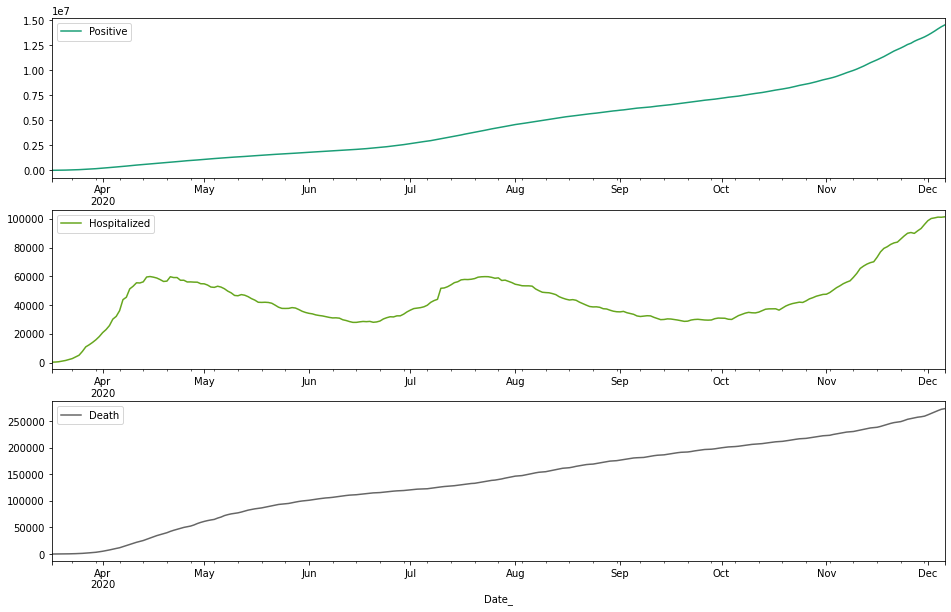

In [38]:
data.plot(colormap='Dark2',
               figsize=(16, 10),
               subplots=True,
               sharex=False,
               sharey=False)           
plt.show()

3. Display boxplot to find the distribution of the variable ‘hospitalized’ and interpret your inferences. Perform boxplot for month wise distribution of the same and explain your inferences.

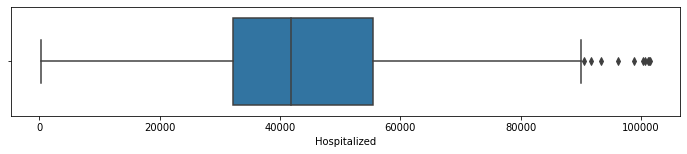

In [39]:
import seaborn as sns
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=data['Hospitalized'],whis=1.5)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efbcaccf9d0>,
      dtype=object)

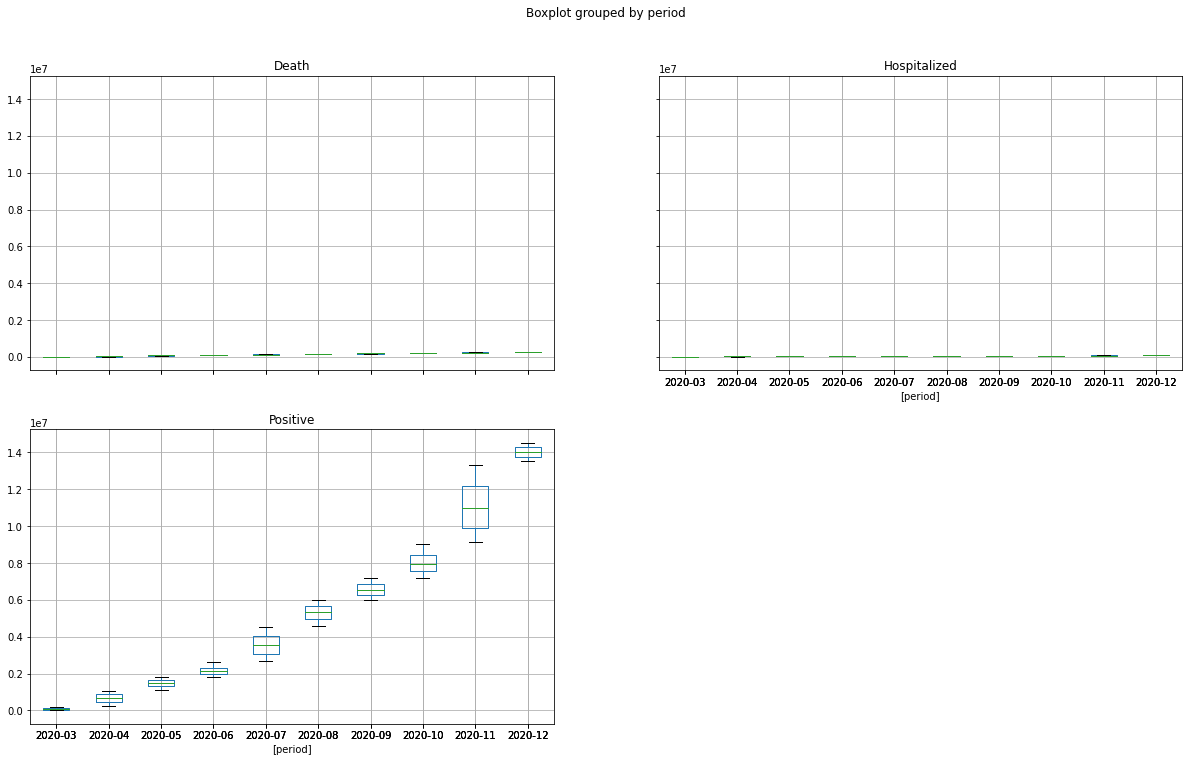

In [40]:
data['period'] = data.index.to_period('M')
data.head()
data.boxplot(by='period',whis=5.0,figsize=(20,12))

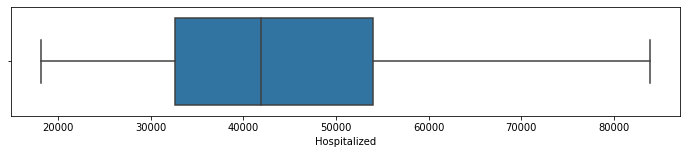

In [51]:
max_threshold = data['Hospitalized'].quantile(0.95)
# max_threshold

min_threshold = data['Hospitalized'].quantile(0.05)
# min_threshold

#Outliers Removed With Quantile
clean_data = data[(data['Hospitalized'] < max_threshold)&(data['Hospitalized']>min_threshold)]
fig = plt.subplots(figsize=(12,2))
sns.boxplot(x=clean_data['Hospitalized'],whis=1.5)

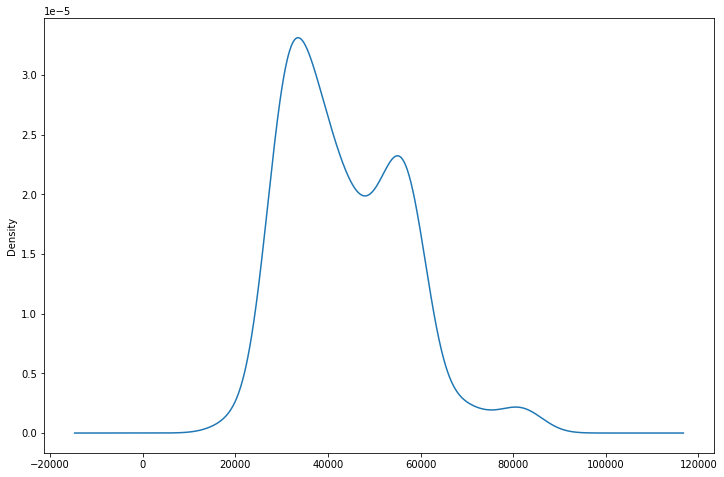

In [52]:
clean_data.Hospitalized.plot.density()

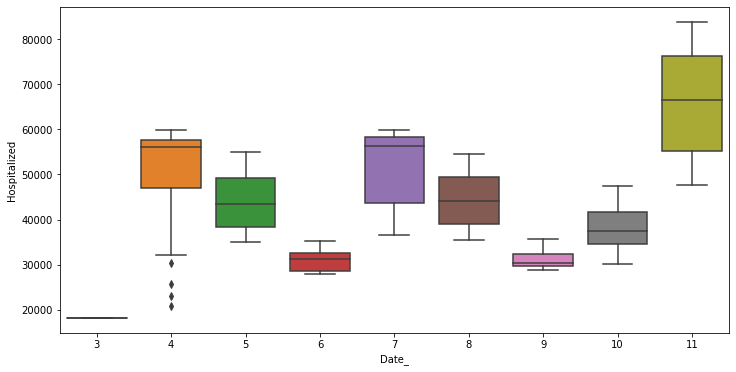

In [53]:
fig = plt.subplots(figsize=(12,6))
sns.boxplot(x=clean_data.index.month,y=clean_data['Hospitalized'])
# outlier_removed_data.head()

4. Perform decomposition of the time series data.

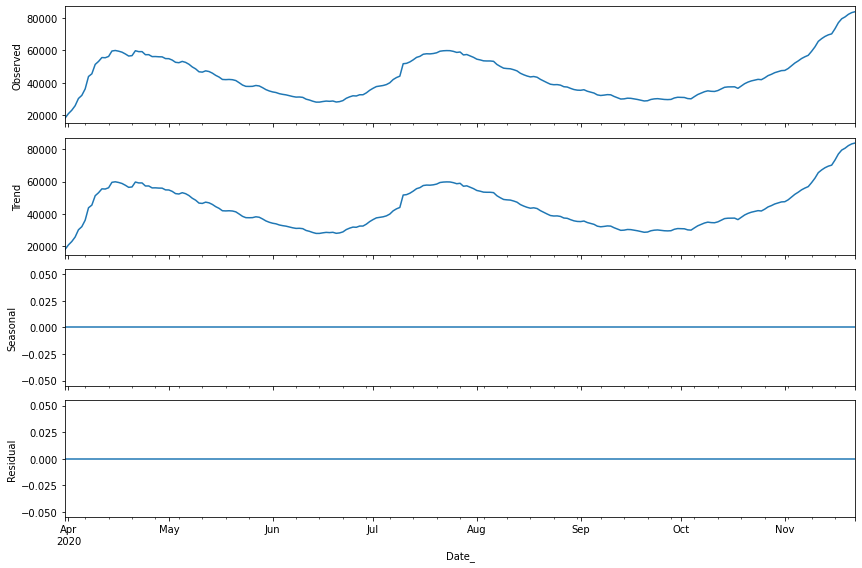

In [54]:
### Additive Decomposition
from pylab import rcParams
import statsmodels.api as sm
# //data.sort_index(inplace=True)
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(x=clean_data['Hospitalized'], model='additive',extrapolate_trend='freq', freq=1) # additive seasonal index
fig = decomposition.plot()
plt.show()

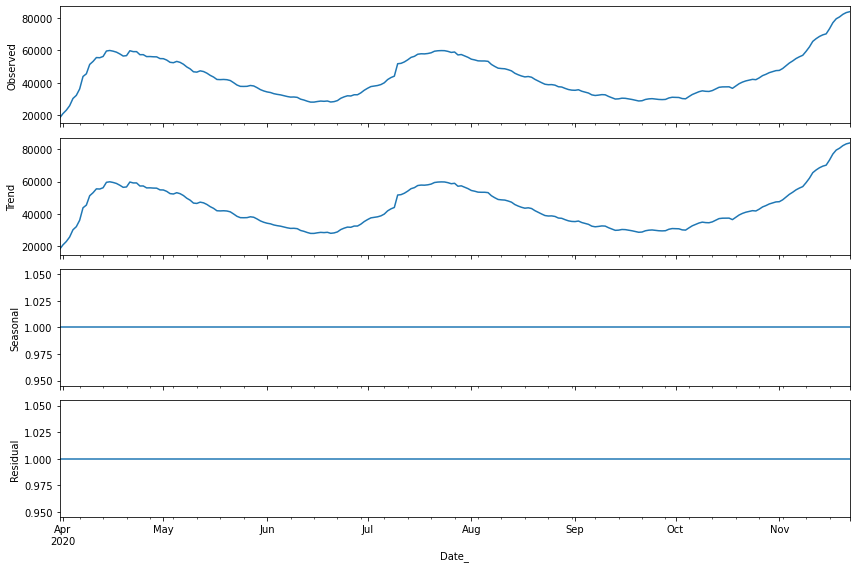

In [55]:
### Multiplicative Decomposition
decomposition = sm.tsa.seasonal_decompose(x=clean_data['Hospitalized'], model='multiplicative',extrapolate_trend='freq', freq=1) # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

5. Is the data stationary? Plot original data and the rolling mean and standard deviation with window = 15. Perform statistical tests to confirm the stationarity of the data.

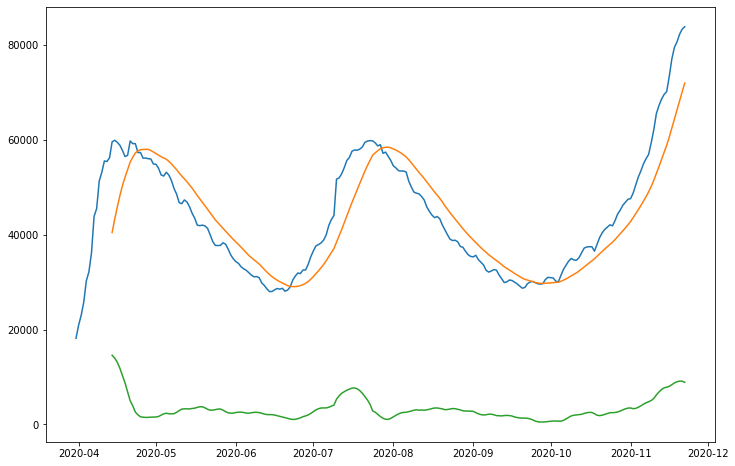

In [56]:
roll_mean=clean_data['Hospitalized'].rolling(window=15).mean()
roll_std=clean_data['Hospitalized'].rolling(window=15).std()
    
original=plt.plot(clean_data['Hospitalized'],label='original')
mean=plt.plot(roll_mean,label='rolling_mean')
std=plt.plot(roll_std,label='rolling_std')

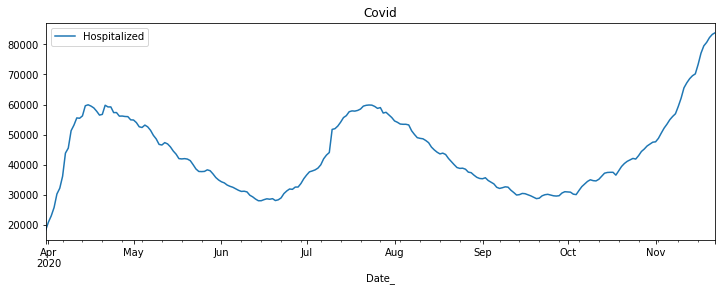

In [57]:
clean_data['Hospitalized'].plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Covid')
plt.show(block=False)

In [58]:
## ADF Test
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(clean_data['Hospitalized'])
print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -1.947605
Critical Values @ 0.05: -2.87
p-value: 0.310008


In [59]:
## KPSS Test
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(clean_data['Hospitalized'])
print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.115011
Critical Values @ 0.05: 0.46
p-value: 0.100000


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


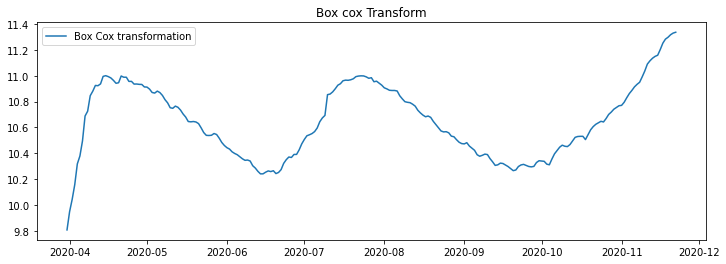

In [60]:
# Boxcox transformation
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(clean_data['Hospitalized'],lmbda=0),index=clean_data.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox,label="Box Cox transformation")
plt.legend(loc='best')
plt.title("Box cox Transform")
plt.show()

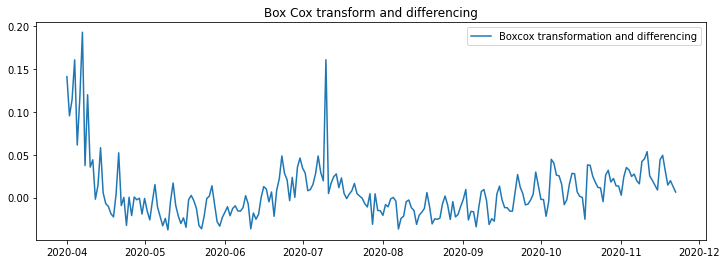

In [61]:
###First order differencing
data_boxcox_diff = pd.Series(data_boxcox-data_boxcox.shift(),clean_data.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff,label="Boxcox transformation and differencing")
plt.legend(loc='best')
plt.title('Box Cox transform and differencing')
plt.show()

In [63]:
#Adf test and KPSS after differencing and Boxcox (First order)

data_boxcox_diff.dropna(inplace=True)

from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data_boxcox_diff)
print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

from statsmodels.tsa.stattools import kpss
kpss_test = kpss(data_boxcox_diff)
print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

ADF Statistic: -2.073563
Critical Values @ 0.05: -2.87
p-value: 0.255277
KPSS Statistic: 0.146148
Critical Values @ 0.05: 0.46
p-value: 0.100000


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [64]:
#Adf test and KPSS after differencing and Boxcox (First order)

data_boxcox_diff_two = pd.Series(data_boxcox_diff-data_boxcox_diff.shift(),clean_data.index)
data_boxcox_diff_two = data_boxcox_diff_two.dropna()

from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data_boxcox_diff_two)
print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

from statsmodels.tsa.stattools import kpss
kpss_test = kpss(data_boxcox_diff_two)
print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])
data_boxcox_diff_two.head()

ADF Statistic: -5.202512
Critical Values @ 0.05: -2.87
p-value: 0.000009
KPSS Statistic: 0.241629
Critical Values @ 0.05: 0.46
p-value: 0.100000


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


Date_
2020-04-02   -0.045763
2020-04-03    0.018791
2020-04-04    0.046490
2020-04-05   -0.099354
2020-04-06    0.055327
dtype: float64

6. Plot ACF and PACF plots for the series.

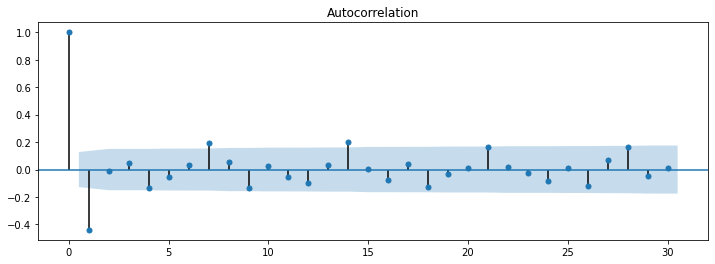

In [65]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,4))
plot_acf(data_boxcox_diff_two, ax=plt.gca(), lags=30)
plt.show()

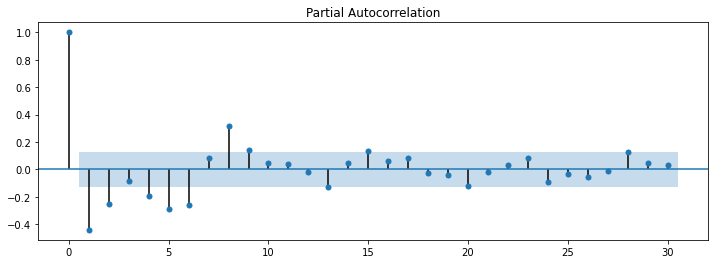

In [66]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(12,4))
plot_pacf(data_boxcox_diff_two, ax=plt.gca(), lags=30)
plt.show()

7. Declare the feature vector and split the data into training and test sets. Consider the data before 06-11-2020 for training data and the rest for the test set.

In [71]:
### Splitting Data into Train and Test
train = clean_data['Hospitalized'].loc[:'11-06-2020']
test = clean_data['Hospitalized'].loc['11-06-2020':]

train_data = pd.DataFrame(train)
train_data.columns=['Hospitalized']

test_data = pd.DataFrame(test)
test_data.columns=['Hospitalized']

8. Perform Simple average model, Exponential Model, AR, MA and ARIMA Model,Compare the Evaluation metrics of the models and interpret your inferences.

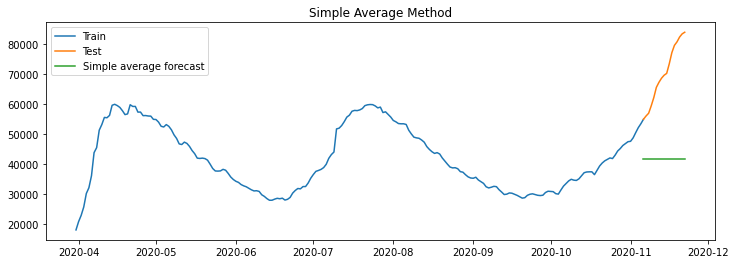

In [73]:
from sklearn.metrics import mean_squared_error

### Simple Average Method
y_hat_avg = test_data.copy()
y_hat_avg['simple_avg_forecast'] = train_data['Hospitalized'].mean()
plt.figure(figsize=(12,4))
plt.plot(train_data['Hospitalized'], label='Train')
plt.plot(test_data['Hospitalized'], label='Test')
plt.plot(y_hat_avg['simple_avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

In [74]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test_data['Hospitalized'], y_hat_avg['simple_avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test_data['Hospitalized']-y_hat_avg['simple_avg_forecast'])/test_data['Hospitalized'])*100,2)

results = pd.DataFrame({'Method':['Simple average method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple average method,29782.57,39.04


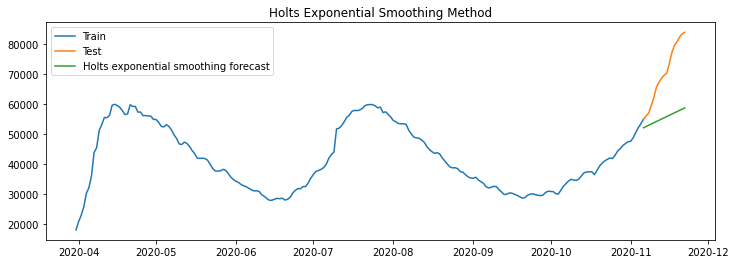

In [75]:
### Holt's Exponential Method
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train_data['Hospitalized']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)

y_hat_holt = test_data.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

plt.figure(figsize=(12,4))
plt.plot( train_data['Hospitalized'], label='Train')
plt.plot(test_data['Hospitalized'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label="Holts exponential smoothing forecast")
plt.legend(loc='best')
plt.title('Holts Exponential Smoothing Method')
plt.show()

In [76]:
rmse = np.sqrt(mean_squared_error(test_data['Hospitalized'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test_data['Hospitalized']-y_hat_holt['holt_forecast'])/test_data['Hospitalized'])*100,2)

tempResults = pd.DataFrame({'Method':['Holts exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple average method,29782.57,39.04
0,Holts exponential smoothing method,16500.20,19.72


In [86]:
### Auto Regression Methods
## AR Model
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(data_boxcox_diff_two, order=(1,0,0)) # (AR) - I - MA
model_fit = model.fit()
print(model_fit.params)

const     -0.000506
ar.L1.y   -0.443096
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [87]:
y_hat_ar = data_boxcox_diff_two.copy()
y_hat_ar['ar_forecast_boxcox_diff_two'] = model_fit.predict(data_boxcox_diff_two.index.min(),data_boxcox_diff_two.index.max())
y_hat_ar['ar_forecast_boxcox_one'] = y_hat_ar['ar_forecast_boxcox_diff_two'].cumsum()
y_hat_ar['ar_forecast_boxcox_one'] = y_hat_ar['ar_forecast_boxcox_one'].add(data_boxcox_diff_two[0])
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_one'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

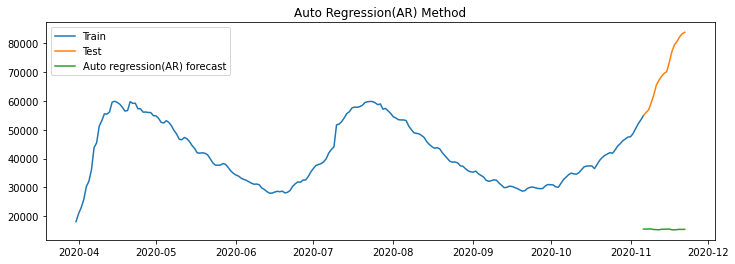

In [88]:
plt.figure(figsize=(12,4))
plt.plot(train_data['Hospitalized'], label='Train')
plt.plot(test_data['Hospitalized'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test_data.index.min():], label='Auto regression(AR) forecast')
plt.legend(loc='best')
plt.title('Auto Regression(AR) Method')
plt.show()

In [82]:
rmse = np.sqrt(mean_squared_error(test_data['Hospitalized'], y_hat_ar['ar_forecast'][test_data.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test_data['Hospitalized']-y_hat_ar['ar_forecast'][test_data.index.min():])/test_data['Hospitalized'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple average method,29782.57,39.04
0,Holts exponential smoothing method,16500.20,19.72
0,Autoregressive (AR) method,55447.50,77.49


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


const     -0.000441
ma.L1.y   -0.678003
dtype: float64


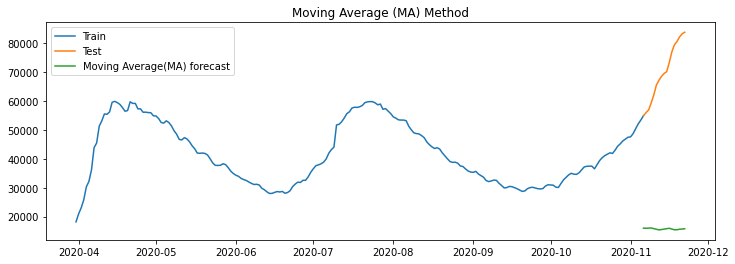

In [89]:
### MA Model
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(data_boxcox_diff_two, order=(0,0,1)) # AR-I-(MA)
model_fit = model.fit()
print(model_fit.params)

y_hat_ma = data_boxcox_diff_two.copy()
y_hat_ma['ma_forecast_boxcox_diff_two'] = model_fit.predict(data_boxcox_diff_two.index.min(),data_boxcox_diff_two.index.max())
y_hat_ma['ma_forecast_boxcox_one'] = y_hat_ma['ma_forecast_boxcox_diff_two'].cumsum()
y_hat_ma['ma_forecast_boxcox_one'] = y_hat_ma['ma_forecast_boxcox_one'].add(data_boxcox_diff_two[0])
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_one'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])


plt.figure(figsize=(12,4))
plt.plot(train_data['Hospitalized'], label='Train')
plt.plot(test_data['Hospitalized'], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test_data.index.min():], label='Moving Average(MA) forecast')
plt.legend(loc='best')
plt.title('Moving Average (MA) Method')
plt.show()


In [90]:
rmse = np.sqrt(mean_squared_error(test_data['Hospitalized'], y_hat_ma['ma_forecast'][test_data.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test_data['Hospitalized']-y_hat_ma['ma_forecast'][test_data.index.min():])/test_data['Hospitalized'])*100,2)

tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple average method,29782.57,39.04
0,Holts exponential smoothing method,16500.20,19.72
0,Autoregressive (AR) method,55447.50,77.49
0,Moving Average (MA) method,55200.79,77.09
0,Moving Average (MA) method,55200.79,77.09


In [91]:
### ARIMA Model
model = ARIMA(data_boxcox, order=(1, 2, 1)) # AR-I-MA
model_fit = model.fit()
print(model_fit.params)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


const        -0.000436
ar.L1.D2.y    0.053137
ma.L1.D2.y   -0.701938
dtype: float64


In [92]:
y_hat_arima = data_boxcox_diff_two.copy()
y_hat_arima['arima_forecast_boxcox_diff_two'] = model_fit.predict(data_boxcox_diff_two.index.min(),data_boxcox_diff_two.index.max())
y_hat_arima['arima_forecast_boxcox_one'] = y_hat_arima['arima_forecast_boxcox_diff_two'].cumsum()
y_hat_arima['arima_forecast_boxcox_one'] = y_hat_arima['arima_forecast_boxcox_one'].add(data_boxcox_diff_two[0])
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_one'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

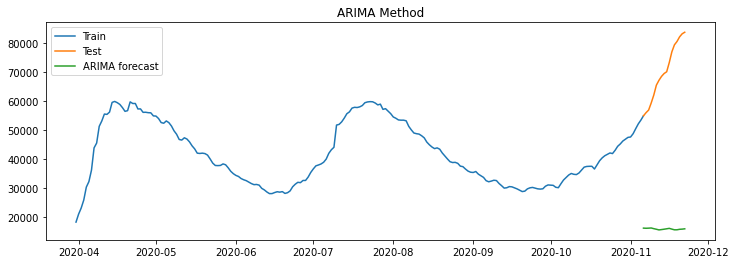

In [94]:
plt.figure(figsize=(12,4))
plt.plot(train_data['Hospitalized'], label='Train')
plt.plot(test_data['Hospitalized'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test_data.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('ARIMA Method')
plt.show()


In [95]:
rmse = np.sqrt(mean_squared_error(test_data['Hospitalized'], y_hat_arima['arima_forecast'][test_data.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test_data['Hospitalized']-y_hat_arima['arima_forecast'][test_data.index.min():])/test_data['Hospitalized'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]

results

,Method,RMSE,MAPE
0,Simple average method,29782.57,39.04
0,Holts exponential smoothing method,16500.20,19.72
0,Autoregressive (AR) method,55447.50,77.49
0,Moving Average (MA) method,55200.79,77.09
0,Moving Average (MA) method,55200.79,77.09
0,Autoregressive integrated moving average (ARIM...,55140.25,77.00
